In [2]:
from fxdata import load_ticker, pip_factor
import pandas as pd
import numpy as np
import keras

Using TensorFlow backend.


### ML Notebook 
- Generate features from fx data
- Split data properly into train, validate and test sets
- Save the data

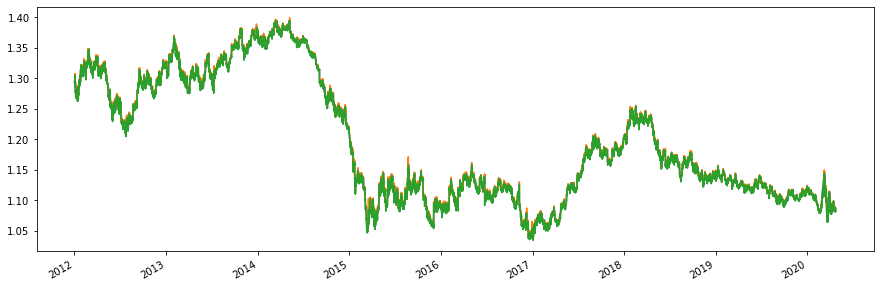

In [3]:
# Task 1 - Remove no data times from the plots

df = load_ticker("EURUSD", 60)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(df)
df.Close.plot(figsize=(15, 5))
df.High.plot(figsize=(15, 5))
df.Low.plot(figsize=(15, 5))

#### Baseline ML task
Usr the previous x candles to predict/classify some quantity of the next one.  
Questions:
How should we scale the data?
Can we scale the previous points so that the model can infer temporal data (just bought another book)?

Lets start with this one:  
Predict the close of the next candle using the close of the previous x candles.  

Need data of the form:
X = [[1,2,3],[4,5,6]]
y = [7,8]

In [4]:
closes_dict = {"lag_1": df.Close.shift(-1), "lag_2": df.Close.shift(-2), "lag_3": df.Close.shift(-3)}
closes_df = pd.DataFrame(closes_dict).dropna()
closes_df['dir'] = np.sign(df.Low-closes_df["lag_1"])
closes_df.tail()


,lag_1,lag_2,lag_3,dir
2020-04-22 16:00:00,1.0813,1.0812,1.0820,1.0
2020-04-22 17:00:00,1.0812,1.0820,1.0815,-1.0
2020-04-22 18:00:00,1.0820,1.0815,1.0821,-1.0
2020-04-22 19:00:00,1.0815,1.0821,1.0822,-1.0
2020-04-22 20:00:00,1.0821,1.0822,1.0822,-1.0


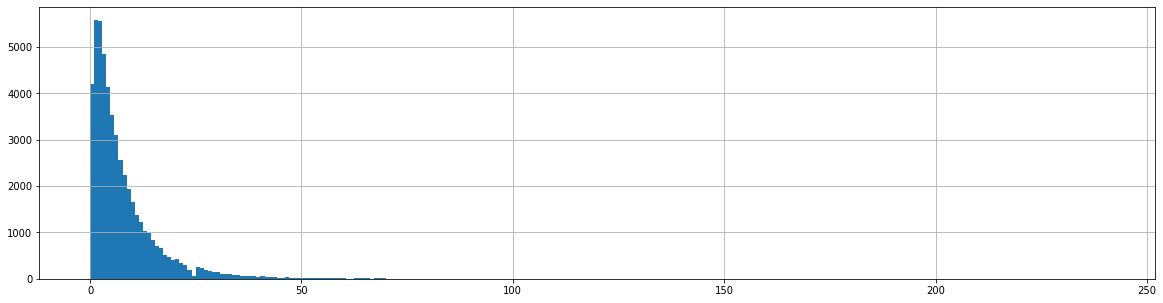

In [13]:
d_low = (df.Open-df.Low) * pip_factor("EURUSD")
d_low.hist(bins=250, figsize=(20,5))

In [42]:
X = closes_df[['lag_1']]
y = closes_df[['dir']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [43]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

/home/georgebastille/miniconda3/envs/twisty-ml/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7477031802120141

### Oracle prediction

In [ ]:
window = 50
df['Stance'] = np.tanh(df['Close'].rolling(window=window,center=True).mean().diff().rolling(window=window,center=True).mean())
df = df.dropna()
df.Stance.plot(figsize=(15, 5), x=df.index.astype(str))
df.Close.plot(figsize=(15, 5), secondary_y=True, grid=True)